In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

from ale_py import ALEInterface
from ale_py.roms import Skiing

In [4]:
ale = ALEInterface()
ale.loadROM(Skiing)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
Game console created:
  ROM file:  /home/makinoharafan1/code/rl-atari-skiing/rl-skiing/lib/python3.11/site-packages/AutoROM/roms/skiing.bin
  Cart Name: Skiing (1980) (Activision) [!]
  Cart MD5:  b76fbadc8ffb1f83e2ca08b6fb4d6c9f
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is 1713789541


In [5]:
from typing import Any, Text

from ale_py.env import gym as ale_gym

# Patch to allow rendering Atari games.
# The AtariEnv's render method expects the mode to be in self._render_mode
# (usually initialized with env.make) instead of taking mode as a param.
_original_atari_render = ale_gym.AtariEnv.render


def atari_render(self, mode: Text = 'rgb_array') -> Any:
  original_render_mode = self._render_mode
  try:
    self._render_mode = mode
    return _original_atari_render(self)
  finally:
    self._render_mode = original_render_mode


ale_gym.AtariEnv.render = atari_render

In [6]:
env = gym.make('ALE/Skiing-v5')
# env = gym.make('ALE/Skiing-v5', render_mode='human')

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [7]:
epsilon = 0.1
num_actions = env.action_space.n

episode_rewards = []

num_episodes = 30

## Epsilon Greedy Policy

In [8]:
Q = np.zeros((num_actions,))

def epsilon_greedy_policy(state):
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q)
    return action
    

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = epsilon_greedy_policy(state)
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        Q[action] += 0.1 * (reward + np.max(Q) - Q[action])
        state = next_state

    episode_rewards.append(total_reward)
    print("Episode:", episode, "Total Reward:", total_reward)

env.close()

Episode: 0 Total Reward: -14236.0
Episode: 1 Total Reward: -22275.0
Episode: 2 Total Reward: -21650.0
Episode: 3 Total Reward: -13592.0
Episode: 4 Total Reward: -21531.0
Episode: 5 Total Reward: -16988.0
Episode: 6 Total Reward: -20742.0
Episode: 7 Total Reward: -21887.0
Episode: 8 Total Reward: -18322.0
Episode: 9 Total Reward: -22553.0
Episode: 10 Total Reward: -21537.0
Episode: 11 Total Reward: -21444.0
Episode: 12 Total Reward: -20573.0
Episode: 13 Total Reward: -14150.0
Episode: 14 Total Reward: -21378.0
Episode: 15 Total Reward: -16636.0
Episode: 16 Total Reward: -14505.0
Episode: 17 Total Reward: -16206.0
Episode: 18 Total Reward: -21478.0
Episode: 19 Total Reward: -15778.0
Episode: 20 Total Reward: -21609.0
Episode: 21 Total Reward: -12581.0
Episode: 22 Total Reward: -19777.0
Episode: 23 Total Reward: -19710.0
Episode: 24 Total Reward: -16951.0
Episode: 25 Total Reward: -13407.0
Episode: 26 Total Reward: -16671.0
Episode: 27 Total Reward: -14101.0
Episode: 28 Total Reward: -223

## Результат 30 траекторий, используя epsilon greedy policy

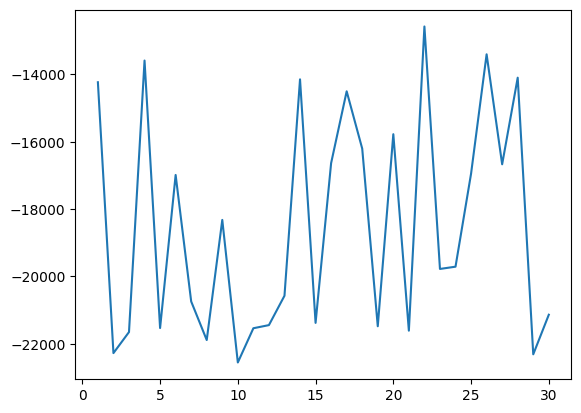

In [10]:
plt.plot(np.arange(1, num_episodes + 1), episode_rewards)
plt.show()

## Точечная оценка J

In [11]:
mean_reward = np.mean(episode_rewards)

## Интервальная оценка J

95.0% Confidence Interval: [-22377.55, -13179.85]


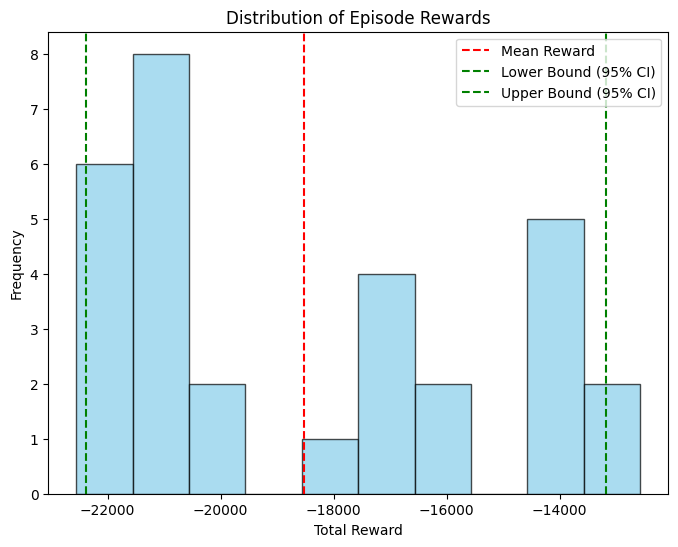

In [12]:
confidence_level = 0.95
lower_percentile = (1 - confidence_level) / 2 * 100
upper_percentile = (1 + confidence_level) / 2 * 100

lower_bound = np.percentile(episode_rewards, lower_percentile)
upper_bound = np.percentile(episode_rewards, upper_percentile)

print(f"{confidence_level * 100}% Confidence Interval: [{lower_bound}, {upper_bound}]")

plt.figure(figsize=(8, 6))
plt.hist(episode_rewards, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=mean_reward, color='red', linestyle='--', label='Mean Reward')
plt.axvline(x=lower_bound, color='green', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound (95% CI)')
plt.xlabel('Total Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Rewards')
plt.legend()
plt.show()